In [1]:
%%html
<iframe src="https://cdn.mazda.ca/common/owners/sirius/1920x540_siriusxm_masthead_v1.ts.2102021136400000.jpg" width="100%" height="400"></iframe>

**Case Study**

"We are experiencing higher than expected calls to our Service department.  Service Agents are at full capacity which is causing long wait times for customers.  Typically, agents are skilled in a specific type of call, so they are subject matter experts.  For example, Service Agents are skilled for Service calls.  

To better assist customers, we allowed all types of agents to handle the high-volume Service calls to optimize for a better customer experience. 

Both Finance and Operations would like you to analyze if we should continue to allow agents who are not primary skilled in Service to take Service calls.  A subset of the call results is in the "data" tab of the Excel documents.   

**What is your recommendation?"**

*General Questions*



1.   Summarize Save Rate by Agent Tenure (< 30 days, 30-90, 91+) 
2.   Which Partner has the highest Conversion Rate?
3.   How long is the average call?
4.   What is the cost per call by Primary Skill?
5.   What is the average Lifetime Value, segmented by Saves vs Conversions? 
6.   Find at least two data anomalies.







In [37]:
import pandas as pd
import os, re
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime, date, timedelta 
from bokeh.plotting import figure, show, output_file
 
import bokeh_catplot
import bokeh.io

import warnings
warnings.filterwarnings('ignore')

bokeh.io.output_notebook()

Loading BokehJS ...

**Download file using read_excel in Pandas**

In [38]:
def open_excel(path, filename, sheetname):
  df = pd.read_excel(open(path+filename,'rb'), sheet_name = sheetname)
  return df

In [9]:
ls /Users/SRIWOPE/Documents/python/datasets/


Case Study - Agent Analysis - Data.xlsx
ML-MATT-CompetitionQT1920_test.csv
ML-MATT-CompetitionQT1920_train.csv
TransactionalDisconnects-20180815.xlsx*
TransactionalDisconnects20181001.xlsx*
TransactionalDisconnects20181008.xlsx*
loan_test_data.csv
loan_train_data.csv
~$Case Study - Agent Analysis - Data.xlsx


In [12]:
df = open_excel('/Users/SRIWOPE/Documents/python/datasets/','Case Study - Agent Analysis - Data.xlsx', 'Data')
print('there are {} rows and {} columns in the data set'.format(df.shape[0], df.shape[1]))
df.head()

there are 1346 rows and 10 columns in the data set


,Transaction Number,Customer ID,AgentID,Partner,Agent Start Date,Primary Skill,Saves,Sales,Time Spent on Call (Seconds),Expected Life Time Value
0,1246,91123,457896,Partner C,2019-09-20,Saves,1,0,272,201
1,918,90795,3000,Partner C,2019-09-20,Service,1,1,25,367
2,1271,91148,457896,Partner C,2019-09-20,Saves,1,0,259,128
3,915,90792,3000,Partner C,2019-09-20,Service,1,0,54,399
4,1268,91145,457896,Partner C,2019-09-20,Saves,1,0,228,136


check if there is missing value

In [39]:
df.isna().sum()

Transaction Number              0
Customer ID                     0
AgentID                         0
Partner                         0
Agent Start Date                0
Primary Skill                   0
Saves                           0
Sales                           0
Time Spent on Call (Seconds)    0
Expected Life Time Value        0
AgentTenure                     0
dtype: int64

In [14]:
df.dtypes

Transaction Number                       int64
Customer ID                              int64
AgentID                                  int64
Partner                                 object
Agent Start Date                datetime64[ns]
Primary Skill                           object
Saves                                    int64
Sales                                    int64
Time Spent on Call (Seconds)             int64
Expected Life Time Value                 int64
dtype: object

calculate a new column for agent tenure 

In [15]:
[x for x in df.columns]

['Transaction Number',
 'Customer ID',
 'AgentID',
 'Partner',
 'Agent Start Date',
 'Primary Skill',
 'Saves',
 'Sales',
 'Time Spent on Call (Seconds)',
 'Expected Life Time Value ']

In [16]:
[x for x in df['Agent Start Date'].unique()]

[numpy.datetime64('2019-09-20T00:00:00.000000000'),
 numpy.datetime64('2019-09-15T00:00:00.000000000'),
 numpy.datetime64('2019-09-10T00:00:00.000000000'),
 numpy.datetime64('2019-09-01T00:00:00.000000000'),
 numpy.datetime64('2019-08-02T00:00:00.000000000'),
 numpy.datetime64('2019-08-01T00:00:00.000000000'),
 numpy.datetime64('2019-06-01T00:00:00.000000000'),
 numpy.datetime64('2019-05-01T00:00:00.000000000'),
 numpy.datetime64('2019-04-02T00:00:00.000000000'),
 numpy.datetime64('2019-04-01T00:00:00.000000000'),
 numpy.datetime64('2019-03-04T00:00:00.000000000'),
 numpy.datetime64('2019-02-06T00:00:00.000000000'),
 numpy.datetime64('2019-02-01T00:00:00.000000000'),
 numpy.datetime64('2019-01-01T00:00:00.000000000'),
 numpy.datetime64('2018-10-15T00:00:00.000000000'),
 numpy.datetime64('2018-03-02T00:00:00.000000000'),
 numpy.datetime64('2017-03-11T00:00:00.000000000'),
 numpy.datetime64('2017-03-10T00:00:00.000000000'),
 numpy.datetime64('2017-02-15T00:00:00.000000000'),
 numpy.datet

In [17]:
import numpy as np

def calc_date_dff(d1):
    event_occur = '09/19/2019'
    datex = datetime.strptime(event_occur, '%m/%d/%Y')
    date = datetime.strptime(d1.strftime('%m/%d/%Y'), '%m/%d/%Y')
    day_diff = datex-date # calculate date different with today date
    no_days = day_diff.days
  # group days into 3 groups (< 30 days, 30-90, 91+)
  # d_grp = np.where(no_days < 30, "< 30 days", (no_days >= 30 & no_days <= 90, "30-90", "91+"))

    return no_days

d1 = df['Agent Start Date'][0]
print(d1)
x = calc_date_dff(d1)
x
# np.where((x < 30, "< 30 days",(x == 777, "777")), "91+")
# df['Agent Start Date'] = df['Agent Start Date'].astype('date')

2019-09-20 00:00:00


-1

In [59]:

today

'11/05/2021'

In [139]:
df = df.drop('AgentTenure', axis=1)

In [18]:
# df['AgentTenure'] = df['Agent Start Date'].apply(lambda x: calc_date_dff(x))
df['AgentTenure'] = df['Agent Start Date'].apply(lambda x: "<30 days" if calc_date_dff(x) >= 0 and calc_date_dff(x) < 30 else ("30-90" if calc_date_dff(x) >= 30 and calc_date_dff(x) < 90 else ("90+" if calc_date_dff(x) >= 90 else "NA")))
df

,Transaction Number,Customer ID,AgentID,Partner,Agent Start Date,Primary Skill,Saves,Sales,Time Spent on Call (Seconds),Expected Life Time Value,AgentTenure
0,1246,91123,457896,Partner C,2019-09-20,Saves,1,0,272,201,NA
1,918,90795,3000,Partner C,2019-09-20,Service,1,1,25,367,NA
2,1271,91148,457896,Partner C,2019-09-20,Saves,1,0,259,128,NA
3,915,90792,3000,Partner C,2019-09-20,Service,1,0,54,399,NA
4,1268,91145,457896,Partner C,2019-09-20,Saves,1,0,228,136,NA
...,...,...,...,...,...,...,...,...,...,...,...
1341,1302,804483,6885,Partner C,2016-09-01,Technical Support,1,0,549,413,90+
1342,1308,7468637,6885,Partner C,2016-09-01,Technical Support,1,0,343,113,90+
1343,1301,5564381,6885,Partner C,2016-09-01,Technical Support,1,0,614,300,90+
1344,1306,10649246,6885,Partner C,2016-09-01,Technical Support,1,0,641,475,90+


In [40]:
df['AgentTenure'].value_counts()

90+         777
<30 days    292
30-90       161
NA          116
Name: AgentTenure, dtype: int64

In [13]:
df.describe()

,Transaction Number,Customer ID,AgentID,Saves,Sales,Time Spent on Call (Seconds),Expected Life Time Value
count,1346.000000,1.346000e+03,1346.000000,1346.000000,1346.000000,1346.000000,1346.000000
mean,795.500000,7.965208e+05,31026.740713,0.611441,0.495542,367.968053,238.035661
std,388.701042,2.204256e+06,99316.326349,0.487604,0.500166,213.841535,138.386518
min,123.000000,4.172500e+04,123.000000,0.000000,0.000000,-197.000000,0.000000
25%,459.250000,9.033525e+04,1600.000000,0.000000,0.000000,204.000000,155.250000
50%,795.500000,9.067150e+04,3814.000000,1.000000,0.000000,367.000000,256.000000
75%,1131.750000,9.100775e+04,7000.000000,1.000000,1.000000,536.750000,349.000000
max,1468.000000,1.109975e+07,457896.000000,1.000000,1.000000,2420.000000,482.000000


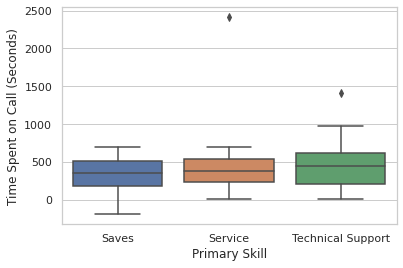

In [30]:
sns.set_theme(style="whitegrid")

ax = sns.boxplot(x=df['Primary Skill'],y=df['Time Spent on Call (Seconds)'])
plt.show()

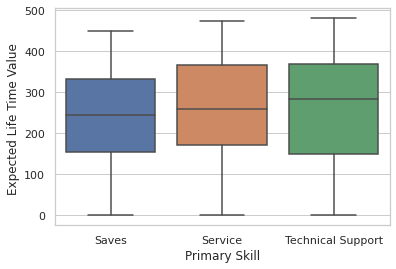

In [33]:
sns.set_theme(style="whitegrid")

ax = sns.boxplot(x=df['Primary Skill'],y=df['Expected Life Time Value '])
plt.show()

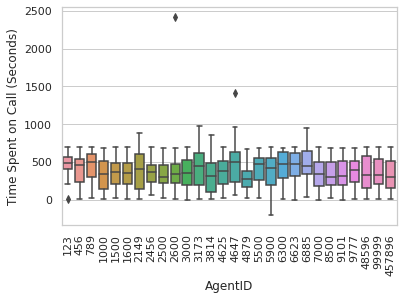

In [35]:
sns.set_theme(style="whitegrid")

ax = sns.boxplot(x=df['AgentID'],y=df['Time Spent on Call (Seconds)'])
plt.xticks(rotation='vertical')
plt.show()

In [20]:
p = bokeh_catplot.box(
    data=df,
    cats='AgentID',
    val='Time Spent on Call (Seconds)',
    tooltips=[
              ('AgentID', '@{AgentID}'),
               ('Time Spent on Call', '@{Time Spent on Call (Seconds)}')

    ],
    height=500,
)
bokeh.io.show(p)

calculate save rate by the agent

In [177]:
sum_save = df.groupby(by=['AgentTenure','AgentID','Primary Skill'])['Saves'].sum().reset_index()
sum_save

,AgentTenure,AgentID,Primary Skill,Saves
0,30-90,1000,Saves,73
1,30-90,7000,Saves,29
2,90+,123,Service,17
3,90+,789,Service,21
4,90+,1600,Service,89
5,90+,2149,Technical Support,22
6,90+,2456,Saves,27
7,90+,2600,Service,36
8,90+,3173,Technical Support,15
9,90+,4647,Technical Support,22


In [178]:
no_call = df.groupby(by=['AgentTenure','AgentID'])['Transaction Number'].count().reset_index()
no_call = no_call.rename({'AgentTenure':'AgentTenure', 'AgentID':'AgentID', 'Transaction Number':'NoCall'},axis=1)


In [179]:
summary_agent = sum_save.merge(no_call, how='inner', on=['AgentTenure','AgentID'])
summary_agent['SaveRate'] = (summary_agent['Saves']/summary_agent['NoCall'])*100
summary_agent

,AgentTenure,AgentID,Primary Skill,Saves,NoCall,SaveRate
0,30-90,1000,Saves,73,104,70.192308
1,30-90,7000,Saves,29,57,50.877193
2,90+,123,Service,17,27,62.962963
3,90+,789,Service,21,43,48.837209
4,90+,1600,Service,89,153,58.169935
5,90+,2149,Technical Support,22,36,61.111111
6,90+,2456,Saves,27,34,79.411765
7,90+,2600,Service,36,57,63.157895
8,90+,3173,Technical Support,15,25,60.000000
9,90+,4647,Technical Support,22,33,66.666667


by Tenure

In [184]:
tenure_save = df.groupby(by=['AgentTenure'])['Saves'].sum().reset_index()
tenure_call = df.groupby(by=['AgentTenure'])['Transaction Number'].count().reset_index()
tenure_call.rename({'AgentTenure':'AgentTenure', 'Transaction Number':'NoOfCall'},axis=1, inplace=True)
summary_save = tenure_save.merge(tenure_call, how='inner', on=['AgentTenure'])
summary_save['SaveRate'] = (summary_save['Saves']/summary_save['NoOfCall'])*100
summary_save

,AgentTenure,Saves,NoOfCall,SaveRate
0,30-90,102,161,63.354037
1,90+,499,777,64.221364
2,<30 days,163,292,55.821918
3,NA,59,116,50.862069


# Save rate by Primary Skill

In [53]:
skill_save = df.groupby(by=['Primary Skill'])['Saves','Sales'].sum().reset_index()
tenure_call = df.groupby(by=['Primary Skill'])['Transaction Number'].count().reset_index()
tenure_call.rename({'Primary Skill':'Primary Skill', 'Transaction Number':'NoOfCall'},axis=1, inplace=True)
summary_save = skill_save.merge(tenure_call, how='inner', on=['Primary Skill'])
summary_save['SaveRate'] = (summary_save['Saves']/summary_save['NoOfCall'])*100
summary_save['convRate'] = (summary_save['Sales']/summary_save['NoOfCall'])*100
summary_save

,Primary Skill,Saves,Sales,NoOfCall,SaveRate,convRate
0,Saves,399,301,614,64.983713,49.022801
1,Service,325,282,564,57.624113,50.000000
2,Technical Support,99,84,168,58.928571,50.000000


which partner that have highest conversion rate?

In [186]:
conv_part = df.groupby(by=['Partner'])['Sales'].sum().reset_index()
partner_call = df.groupby(by=['Partner'])['Transaction Number'].count().reset_index()
partner_call.rename({'Partner':'Partner', 'Transaction Number':'NoOfCall'},axis=1, inplace=True)
summary_conv = conv_part.merge(partner_call, how='inner', on=['Partner'])
summary_conv['ConvRate'] = (summary_conv['Sales']/summary_conv['NoOfCall'])*100
summary_conv

,Partner,Sales,NoOfCall,ConvRate
0,Partner A,233,456,51.096491
1,Partner B,126,275,45.818182
2,Partner C,308,615,50.081301


How long is the average call?


In [187]:
df['Time Spent on Call (Seconds)'].mean()

367.9680534918276

In [194]:
cost = df.groupby(by=['Primary Skill'])['Time Spent on Call (Seconds)'].sum().reset_index()
call = df.groupby(by=['Primary Skill'])['Transaction Number'].count().reset_index()
cost_df = cost.merge(call, how='inner',on='Primary Skill')
cost_df['Cost'] = cost_df['Time Spent on Call (Seconds)'].apply(lambda x: (x/60/60)*18)
cost_df['CPC'] = cost_df['Cost']/cost_df['Transaction Number']
cost_df

,Primary Skill,Time Spent on Call (Seconds),Transaction Number,Cost,CPC
0,Saves,211609,614,1058.045,1.723200
1,Service,213556,564,1067.780,1.893227
2,Technical Support,70120,168,350.600,2.086905


what is the average Lifetime Value, segmented by Saves vs Conversions

In [196]:
df.groupby(by=['Saves','Sales'])['Expected Life Time Value '].mean()

Saves  Sales
0      0          1.470588
       1        268.919298
1      0        297.167800
       1        294.117801
Name: Expected Life Time Value , dtype: float64

In [215]:
no_sale = df.query('Saves == "0" & Sales == "0"')
no_sale.query('`Expected Life Time Value ` > 0')


,Transaction Number,Customer ID,AgentID,Partner,Agent Start Date,Primary Skill,Saves,Sales,Time Spent on Call (Seconds),Expected Life Time Value,AgentTenure
20,1260,91137,457896,Partner C,2019-09-20,Saves,0,0,197,350,NA


In [216]:
df.query('AgentID == 2600')

,Transaction Number,Customer ID,AgentID,Partner,Agent Start Date,Primary Skill,Saves,Sales,Time Spent on Call (Seconds),Expected Life Time Value,AgentTenure
906,888,90765,2600,Partner C,2019-02-06,Service,1,1,36,218,90+
907,894,90771,2600,Partner C,2019-02-06,Service,1,0,46,413,90+
908,908,90785,2600,Partner C,2019-02-06,Service,1,1,53,386,90+
909,860,90737,2600,Partner C,2019-02-06,Service,1,0,58,332,90+
910,897,90774,2600,Partner C,2019-02-06,Service,1,1,214,205,90+
911,892,90769,2600,Partner C,2019-02-06,Service,1,0,345,381,90+
912,859,90736,2600,Partner C,2019-02-06,Service,1,0,2420,431,90+
913,857,90734,2600,Partner C,2019-02-06,Service,1,0,239,447,90+
914,901,90778,2600,Partner C,2019-02-06,Service,1,0,185,363,90+
915,865,90742,2600,Partner C,2019-02-06,Service,1,0,192,445,90+


In [217]:
p = bokeh_catplot.box(
    data=df,
    cats='AgentID',
    val='Expected Life Time Value ',
    tooltips=[
              ('AgentID', '@{AgentID}'),
               ('LTV', '@{Expected Life Time Value }')

    ],
    height=500,
)
bokeh.io.show(p)

In [224]:
df.groupby(by='Customer ID')['Transaction Number'].count().sort_values(ascending=False)

Customer ID
11099749    1
90450       1
90442       1
90443       1
90444       1
           ..
90897       1
90898       1
90899       1
90900       1
41725       1
Name: Transaction Number, Length: 1346, dtype: int64

In [41]:
df.query('`Time Spent on Call (Seconds)` >= 0 and `Time Spent on Call (Seconds)` <= 1000')

,Transaction Number,Customer ID,AgentID,Partner,Agent Start Date,Primary Skill,Saves,Sales,Time Spent on Call (Seconds),Expected Life Time Value,AgentTenure
0,1246,91123,457896,Partner C,2019-09-20,Saves,1,0,272,201,NA
1,918,90795,3000,Partner C,2019-09-20,Service,1,1,25,367,NA
2,1271,91148,457896,Partner C,2019-09-20,Saves,1,0,259,128,NA
3,915,90792,3000,Partner C,2019-09-20,Service,1,0,54,399,NA
4,1268,91145,457896,Partner C,2019-09-20,Saves,1,0,228,136,NA
...,...,...,...,...,...,...,...,...,...,...,...
1341,1302,804483,6885,Partner C,2016-09-01,Technical Support,1,0,549,413,90+
1342,1308,7468637,6885,Partner C,2016-09-01,Technical Support,1,0,343,113,90+
1343,1301,5564381,6885,Partner C,2016-09-01,Technical Support,1,0,614,300,90+
1344,1306,10649246,6885,Partner C,2016-09-01,Technical Support,1,0,641,475,90+


<AxesSubplot:xlabel='Time Spent on Call (Seconds)', ylabel='Count'>

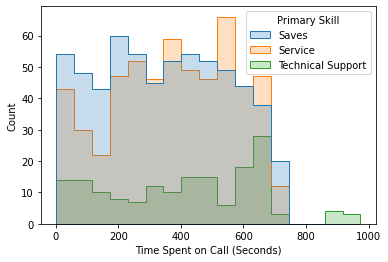

In [42]:
sns.histplot(data = df.query('`Time Spent on Call (Seconds)` >= 0 and `Time Spent on Call (Seconds)` <= 1000'),
             x='Time Spent on Call (Seconds)', hue = 'Primary Skill', element="step")

<AxesSubplot:xlabel='Time Spent on Call (Seconds)', ylabel='Count'>

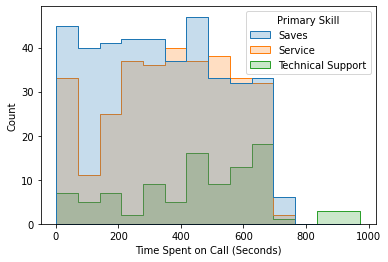

In [43]:
sns.histplot(data=df.query('Saves == 1 & `Time Spent on Call (Seconds)` >= 0 and `Time Spent on Call (Seconds)` <= 1000')
             , x='Time Spent on Call (Seconds)', hue = 'Primary Skill', element="step")

<AxesSubplot:xlabel='Time Spent on Call (Seconds)', ylabel='Count'>

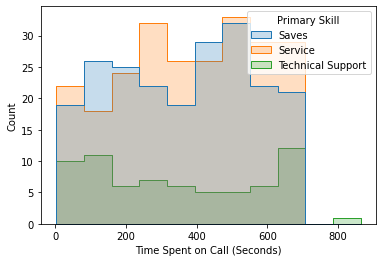

In [44]:
sns.histplot(data=df.query('Saves == 0 & `Time Spent on Call (Seconds)` >= 0 and `Time Spent on Call (Seconds)` <= 1000')
             , x='Time Spent on Call (Seconds)', hue = 'Primary Skill', element="step")

<AxesSubplot:xlabel='Time Spent on Call (Seconds)', ylabel='Count'>

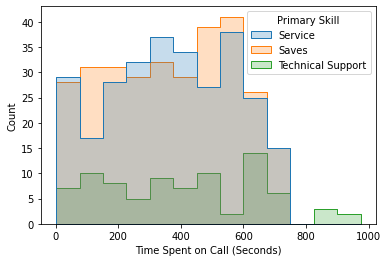

In [45]:
sns.histplot(data=df.query('Sales == 1 & `Time Spent on Call (Seconds)` >= 0 and `Time Spent on Call (Seconds)` <= 1000')
             , x='Time Spent on Call (Seconds)', hue = 'Primary Skill', element="step")

<AxesSubplot:xlabel='Time Spent on Call (Seconds)', ylabel='Count'>

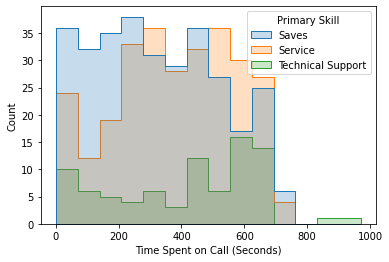

In [46]:
sns.histplot(data=df.query('Sales == 0 & `Time Spent on Call (Seconds)` >= 0 and `Time Spent on Call (Seconds)` <= 1000'), x='Time Spent on Call (Seconds)', hue = 'Primary Skill', element="step")

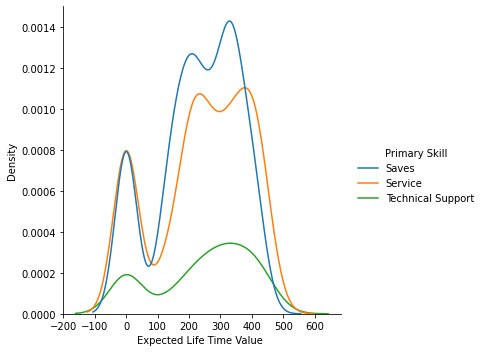

In [47]:
sns.displot(data=df.query('`Time Spent on Call (Seconds)` >= 0 and `Time Spent on Call (Seconds)` <= 1000'), x='Expected Life Time Value ' ,hue='Primary Skill', kind='kde')

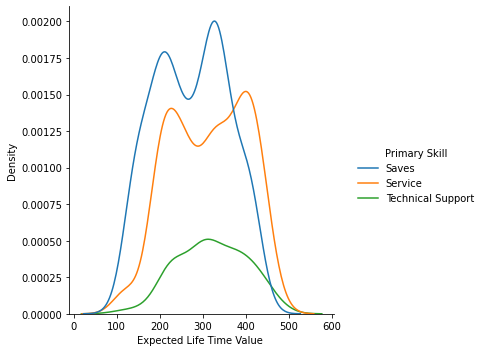

In [48]:
sns.displot(data=df.query('Saves == 1 & `Time Spent on Call (Seconds)` >= 0 and `Time Spent on Call (Seconds)` <= 1000')
            , x='Expected Life Time Value ' ,hue='Primary Skill', kind='kde')

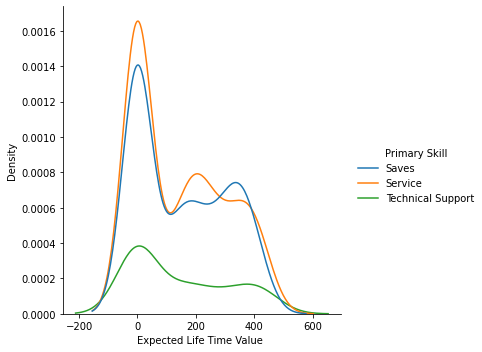

In [49]:
sns.displot(data=df.query('Saves == 0& `Time Spent on Call (Seconds)` >= 0 and `Time Spent on Call (Seconds)` <= 1000')
            , x='Expected Life Time Value ' ,hue='Primary Skill', kind='kde')

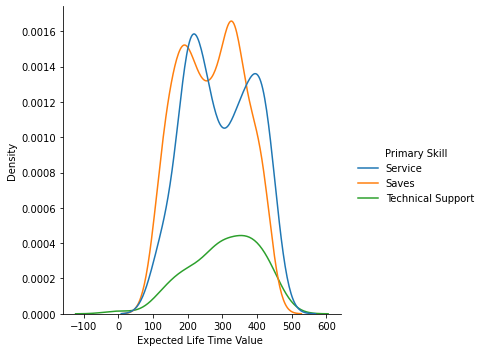

In [50]:
sns.displot(data=df.query('Sales == 1 & `Time Spent on Call (Seconds)` >= 0 and `Time Spent on Call (Seconds)` <= 1000'),
            x='Expected Life Time Value ' ,hue='Primary Skill', kind='kde')

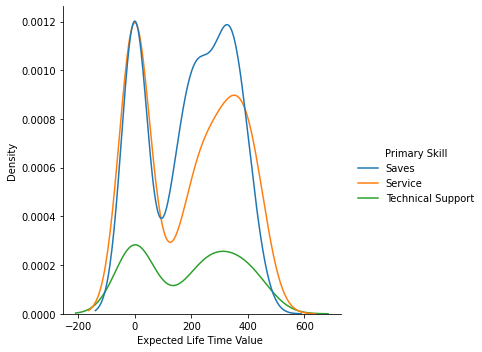

In [51]:
sns.displot(data=df.query('Sales == 0& `Time Spent on Call (Seconds)` >= 0 and `Time Spent on Call (Seconds)` <= 1000'), x='Expected Life Time Value ' ,hue='Primary Skill', kind='kde')